---
jupyter: python3
toc: true
toc-depth: 3
number-sections: true
title: (3) 값 삭제, 대체
date: 2021-11-05
categories: pandas
author: limyj0708
comments:
  giscus:
    repo: quarto-dev/quarto-docs
format:
    html:
        page-layout: full
---

In [56]:
import pandas as pd
import numpy as np
import copy
from IPython.display import display_html, display

In [57]:
def display_multiple_dfs(dfs:list, styles, margin=10):
    display_target = ''
    for each_df in dfs:
        each_df_html = each_df[0].style.set_caption(f'<b>{each_df[1]}</b>').set_table_styles(styles).set_table_attributes(f"style='display:inline;margin:{margin}px'")._repr_html_()
        display_target += each_df_html
    display_html(display_target, raw = True)

In [58]:
styles = [
    {"selector" : "caption", "props" : "text-align:center; font-size:16px"}
]

# read_excel

In [ ]:
string_quest = pd.read_excel(r"C:\Users\Documents\data\string\string_quest.xlsx",
                             header=6, usecols="H,I", sheet_name = "string_quest", engine="openpyxl")

- header : 몇 번째 row를 header로 할까?
- usercols : 어떤 열을 가져올까?
- sheet_name : 어떤 시트를 가져올까?
- engine : openpyxl을 사용하여야 xlsx 파일의 불러오기가 가능

# to_excel

- 데이터프레임을 잘 구성했다면, 기본적으로는 아래와 같이 특별한 argument 없이 사용해도 별 문제는 없다.

In [ ]:
for each_key in dict_account_id.keys():
    target_dataframe = pd.DataFrame.from_dict(dict_account_id[each_key])
    target_dataframe.to_excel(f"{each_key}_성장재료_출처.xlsx")

- 내용 추가 모드 (append)를 사용하고 싶다면, 아래와 같이 할 수 있다.

In [ ]:
with pd.ExcelWriter('output.xlsx', mode='a') as writer: # mode='a'로 append 설정
    df.to_excel(writer, sheet_name='Sheet_name_3') #sheet 이름도 지정함

- 추가 내용 : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html

# read_csv

In [ ]:
target_df = pd.read_csv('data.csv')

- sep : delimeter. 기본값은 쉼표(,)이다.
- header : 몇 번째 row를 header로 할까?
- usercols : 어떤 열을 가져올까?
- chunksize : 파일이 너무 클 경우, 한 번에 불러올 행 수를 지정 가능. 이후 iterable하게 다음 size를 불러올 수 있다. 아래와 같이 사용.
```Python
chunksize = 10 ** 6
with pd.read_csv(filename, chunksize=chunksize) as reader:
    for chunk in reader:
        process(chunk)
```

- 추가 내용 : https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

# to_csv

In [ ]:
target_df = pd.to_csv('data.csv')

- sep : delimeter. 기본값은 쉼표(,)이다.
- columns : 쓰기에 사용할 컬럼 이름 리스트.
- header : bool or list of str, default True
    - 문자열 리스트가 주어지면, 각 컬럼에 대한 alias로 취급된다.

- 추가 내용 : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

# Parquet

# Dataframe을 이미지로 추출

## matplotlib를 이용
  - dataframe-image 패키지를 이용 시, linux에서 crontab으로 실행할 경우 복잡한 권한 문제에 직면하게 됨
  - dataframe-image 패키지도 matplotlib 기반이므로, 그냥 matplotlib를 사용

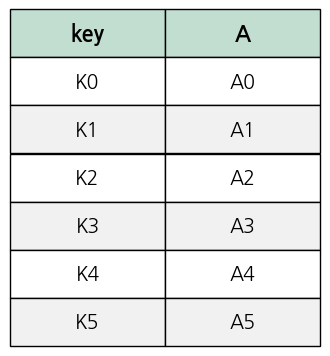

In [372]:
import six
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# matplotlib에서 한글이 안 나오는 문제 해결
NANUM = fm.FontProperties(fname=r'/Users/limyj0708/Library/Fonts/NanumGothic.ttf')
NANUM_bold = fm.FontProperties(fname=r'/Users/limyj0708/Library/Fonts/NanumGothicBold.ttf')

# centos라면 폰트 경로는 아래와 같음
 # /usr/share/fonts/NanumFont/NanumBarunGothic.ttf
 # /usr/share/fonts/NanumFont/NanumGothicBold.ttf

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size_header=16, font_size=14,
                     header_color='#C2DED1', row_colors=['#f1f1f2', 'w'], edge_color='black',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, align_head='center', align_cell='center', **kwargs):
    """
    align_head, align_cell : [ 'center' | 'right' | 'left' ] 
    """
    
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_facecolor(header_color)
            cell.set_text_props(color='black', fontproperties = NANUM_bold, fontsize=font_size_header, ha=align_head)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors)])
            cell.set_text_props(fontproperties = NANUM, fontsize=font_size, ha=align_cell)
    return ax

image = render_mpl_table(caller, col_width=2.0, align_head='center')
image
image.figure.savefig("caller.png") # 이미지 저장